In [57]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ScraNNtch
import sklearn
from ScraNNtch import Term , Neuron , MLP , Layer

In [58]:
from planar_utils import plot_decision_boundary, sigmoid, load_planar_dataset, load_extra_datasets

X ,y =load_planar_dataset()
X = X.astype('float64')
y = y.astype('float64')

# Simple Logistic Regression

In [60]:
# Train the logistic regression classifier

clf = sklearn.linear_model.LogisticRegressionCV();
clf.fit(X.T, y.T);

C:\Users\dell\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy of logistic regression: 47 % (percentage of correctly labelled datapoints)


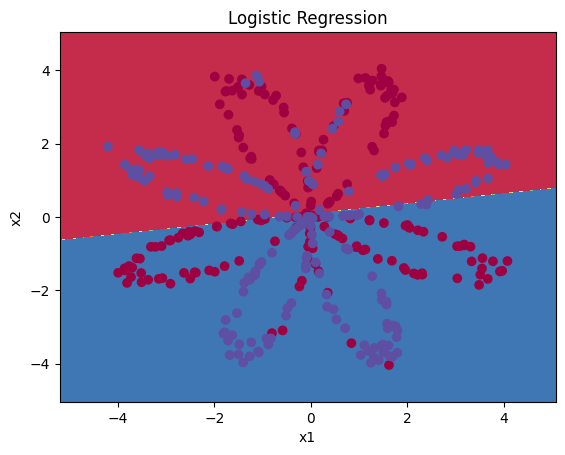

In [62]:
# Plot the decision boundary for logistic regression
plot_decision_boundary(lambda x: clf.predict(x), X, y)
plt.title("Logistic Regression")

# Print accuracy
LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(y,LR_predictions) + np.dot(1-y,1-LR_predictions))/float(y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

# Neural Network

In [ ]:
y = y*2 - 1 # make y be -1 or 1
y = y.flatten()
X = X.T

In [64]:
# initialize a model 
model = MLP(2, [16, 16, 1]) # 2-layer neural network

In [65]:
# loss function
def loss(batch_size=None):
    
    # inline DataLoader :)
    if batch_size is None:
        Xb, yb = X, y
    else:
        ri = np.random.permutation(X.shape[0])[:batch_size]
        Xb, yb = X[ri], y[ri]
    inputs = [list(map(Term, xrow)) for xrow in Xb]
    
    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)

Term(data=0.9810736805805373, grad=0.0) 0.5


In [66]:
print(X.shape, " - " ,y.shape)

(400, 2)  -  (400,)


In [67]:
# optimization
for k in range(100):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    model.zero_grad()
    total_loss.back_propagation()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")

step 0 loss 0.9810736805805373, accuracy 50.0%
step 1 loss 0.8658444799222019, accuracy 53.75%
step 2 loss 0.7041618019076983, accuracy 69.0%
step 3 loss 0.5674446657090977, accuracy 76.0%
step 4 loss 0.6306816812671149, accuracy 72.75%
step 5 loss 0.7310561164088509, accuracy 63.5%
step 6 loss 0.6075195919684381, accuracy 71.5%
step 7 loss 0.434526608290483, accuracy 81.0%
step 8 loss 0.3951846319050689, accuracy 83.75%
step 9 loss 0.38155914496915344, accuracy 84.25%
step 10 loss 0.37516766162762877, accuracy 84.25%
step 11 loss 0.3776812872923613, accuracy 84.5%
step 12 loss 0.3948512582511511, accuracy 84.0%
step 13 loss 0.39748924058052443, accuracy 83.0%
step 14 loss 0.4064157019608592, accuracy 82.5%
step 15 loss 0.3652034372723988, accuracy 84.0%
step 16 loss 0.35036312569816735, accuracy 83.75%
step 17 loss 0.33960948064693774, accuracy 85.5%
step 18 loss 0.3375063848012258, accuracy 84.0%
step 19 loss 0.33255451884791437, accuracy 85.75%
step 20 loss 0.33095770242872496, accu

(-5.035124003739587, 4.964875996260413)

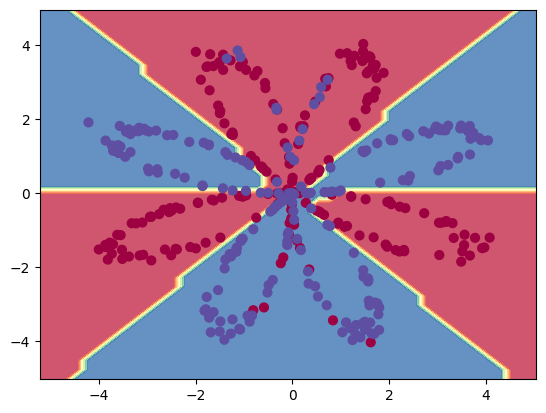

In [68]:
# visualize decision boundary

h = 0.25
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Xmesh = np.c_[xx.ravel(), yy.ravel()]
inputs = [list(map(Term, xrow)) for xrow in Xmesh]
scores = list(map(model, inputs))
Z = np.array([s.data > 0 for s in scores])
Z = Z.reshape(xx.shape)

fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())